In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [4]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [7]:
sec_inputs = np.load ("../../initial_data2/function_1/initial_inputs.npy")
sec_outputs = np.load ("../../initial_data2/function_1/initial_outputs.npy")

In [9]:
orig_inputs, sec_inputs

(array([[0.31940389, 0.76295937],
        [0.57432921, 0.8798981 ],
        [0.73102363, 0.73299988],
        [0.84035342, 0.26473161],
        [0.65011406, 0.68152635],
        [0.41043714, 0.1475543 ],
        [0.31269116, 0.07872278],
        [0.68341817, 0.86105746],
        [0.08250725, 0.40348751],
        [0.88388983, 0.58225397]]),
 array([[0.90048221, 0.46996691],
        [0.86243528, 0.4352856 ],
        [0.09311333, 0.31520745],
        [0.48975434, 0.16844847],
        [0.90132685, 0.67366454],
        [0.32101719, 0.63497061],
        [0.32044659, 0.42030664],
        [0.63861791, 0.73839723],
        [0.59648578, 0.61407967],
        [0.48366726, 0.31942835],
        [0.96227495, 0.90831843],
        [0.46937596, 0.55313941],
        [0.06938944, 0.62671938],
        [0.59640851, 0.81673367],
        [0.1409109 , 0.3179331 ],
        [0.58653471, 0.20732755],
        [0.61533925, 0.18320905],
        [0.9068703 , 0.76151747],
        [0.58038966, 0.57243686],
        [0.5

In [11]:
orig_outputs, sec_outputs

(array([ 1.32267704e-079,  1.03307824e-046,  7.71087511e-016,
         3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
        -2.08909327e-091,  2.53500115e-040,  3.60677119e-081,
         6.22985647e-048]),
 array([-3.23831206e-070, -2.66554974e-065, -6.53456227e-084,
         1.33208482e-048,  2.94212475e-055,  8.33516100e-040,
        -5.03981978e-008, -2.01007653e-009,  6.59147585e-002,
         5.59549084e-011,  4.50954445e-133, -4.05280070e-015,
        -7.40958578e-118,  8.49132032e-027, -8.80550875e-064,
        -9.89621108e-052, -2.68384158e-067,  1.19343278e-067,
         6.90381175e-005,  4.65270195e-006]))

In [13]:
len(orig_outputs), len(sec_outputs)

(10, 20)

In [15]:
# Add the new data points
new_data = np.array([[0.743553, 0.12131], [0.697682, 0.753076], [0.5, 0.5], [0.204046, 0.331466], [0.682507, 0.806851], 
                     [0.706954, 0.783924], [0.17, 0.5], [0.602555, 0.617983], [0.25 , 0.375], [0.604695, 0.640541], 
                     [0.565039, 0.645641], [0.529448, 0.649782], [0.63, 0.63], [0.547742, 0.660736], [0.651027, 0.631695]])
inputs = np.vstack([orig_inputs, sec_inputs, new_data])

len(orig_inputs), len(inputs)

(10, 45)

In [17]:
inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.90048221, 0.46996691],
       [0.86243528, 0.4352856 ],
       [0.09311333, 0.31520745],
       [0.48975434, 0.16844847],
       [0.90132685, 0.67366454],
       [0.32101719, 0.63497061],
       [0.32044659, 0.42030664],
       [0.63861791, 0.73839723],
       [0.59648578, 0.61407967],
       [0.48366726, 0.31942835],
       [0.96227495, 0.90831843],
       [0.46937596, 0.55313941],
       [0.06938944, 0.62671938],
       [0.59640851, 0.81673367],
       [0.1409109 , 0.3179331 ],
       [0.58653471, 0.20732755],
       [0.61533925, 0.18320905],
       [0.9068703 , 0.76151747],
       [0.58038966, 0.57243686],
       [0.55684911, 0.58265192],
       [0.

In [19]:
len(orig_inputs), len(inputs)

(10, 45)

In [21]:
outputs = np.append(orig_outputs, sec_outputs)
outputs = np.append(outputs, 1.6446384844289582e-135)
outputs = np.append(outputs, -3.938405615640186e-15)
outputs = np.append(outputs, 2.6752879910742468e-09)
outputs = np.append(outputs, 2.2497465049331488e-39)
outputs = np.append(outputs, -5.594823758908742e-25)
outputs = np.append(outputs, -1.779396272985611e-21)
outputs = np.append(outputs, 4.805164559106829e-49)
outputs = np.append(outputs, 0.26258155955233065)
outputs = np.append(outputs, -2.8083507427706665e-23)
outputs = np.append(outputs, 0.32820601173296776)
outputs = np.append(outputs, -0.001262781687871458)
outputs = np.append(outputs, -6.562279988064917e-08)
outputs = np.append(outputs, 1.9796320316224518)
outputs = np.append(outputs, -3.079894419994802e-06)
outputs = np.append(outputs, 0.5408351614476046)
outputs

array([ 1.32267704e-079,  1.03307824e-046,  7.71087511e-016,
        3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
       -2.08909327e-091,  2.53500115e-040,  3.60677119e-081,
        6.22985647e-048, -3.23831206e-070, -2.66554974e-065,
       -6.53456227e-084,  1.33208482e-048,  2.94212475e-055,
        8.33516100e-040, -5.03981978e-008, -2.01007653e-009,
        6.59147585e-002,  5.59549084e-011,  4.50954445e-133,
       -4.05280070e-015, -7.40958578e-118,  8.49132032e-027,
       -8.80550875e-064, -9.89621108e-052, -2.68384158e-067,
        1.19343278e-067,  6.90381175e-005,  4.65270195e-006,
        1.64463848e-135, -3.93840562e-015,  2.67528799e-009,
        2.24974650e-039, -5.59482376e-025, -1.77939627e-021,
        4.80516456e-049,  2.62581560e-001, -2.80835074e-023,
        3.28206012e-001, -1.26278169e-003, -6.56227999e-008,
        1.97963203e+000, -3.07989442e-006,  5.40835161e-001])

In [23]:
len(outputs)

45

In [25]:
orig_data = {'feature1': orig_inputs[:,0],
        'feature2': orig_inputs[:,1],
        'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,target
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [27]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,target
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


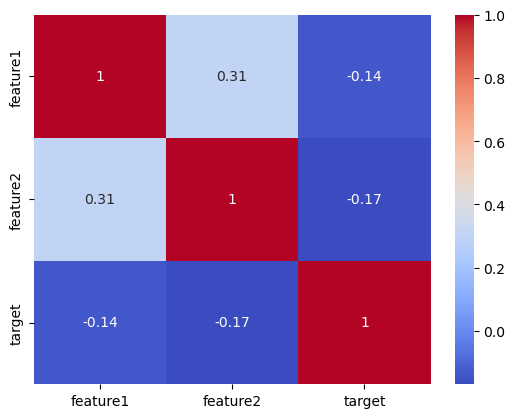

In [29]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

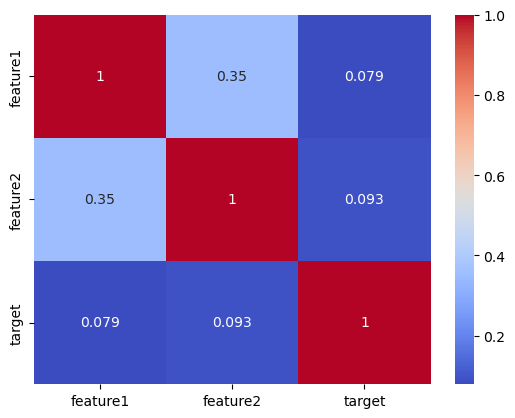

In [31]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  45 non-null     float64
 1   feature2  45 non-null     float64
 2   target    45 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [35]:
orig_df.describe()

,feature1,feature2,target
count,10.000000,10.000000,1.000000e+01
mean,0.548817,0.539519,-3.606063e-04
std,0.259160,0.296007,1.140337e-03
min,0.082507,0.078723,-3.606063e-03
25%,0.342162,0.299421,-1.566820e-91
50%,0.612222,0.631890,6.793724e-80
75%,0.719122,0.755469,7.903833e-47
max,0.883890,0.879898,7.710875e-16


In [37]:
df.describe()

,feature1,feature2,target
count,45.000000,45.000000,4.500000e+01
mean,0.548113,0.541399,7.049714e-02
std,0.237031,0.222722,3.078086e-01
min,0.069389,0.078723,-3.606063e-03
25%,0.410437,0.375000,-9.896211e-52
50%,0.586535,0.614080,3.341771e-124
75%,0.683418,0.681526,2.249747e-39
max,0.962275,0.908318,1.979632e+00


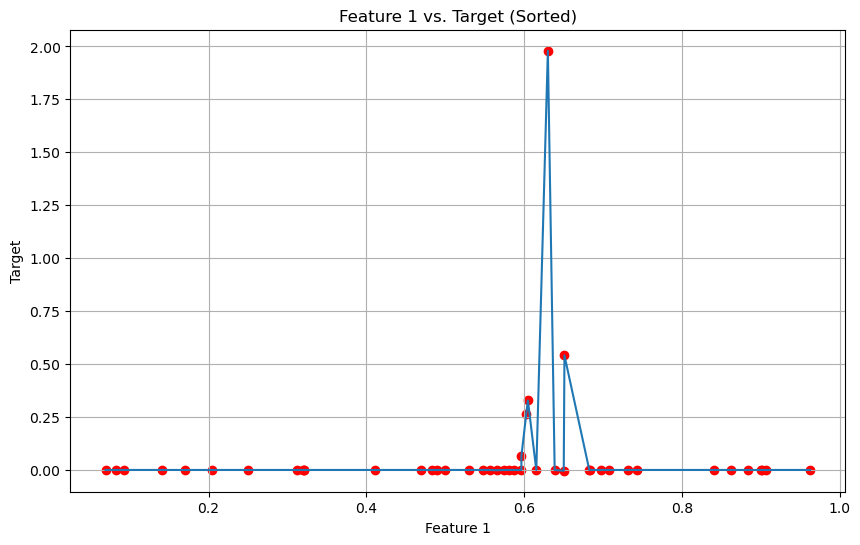

In [39]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

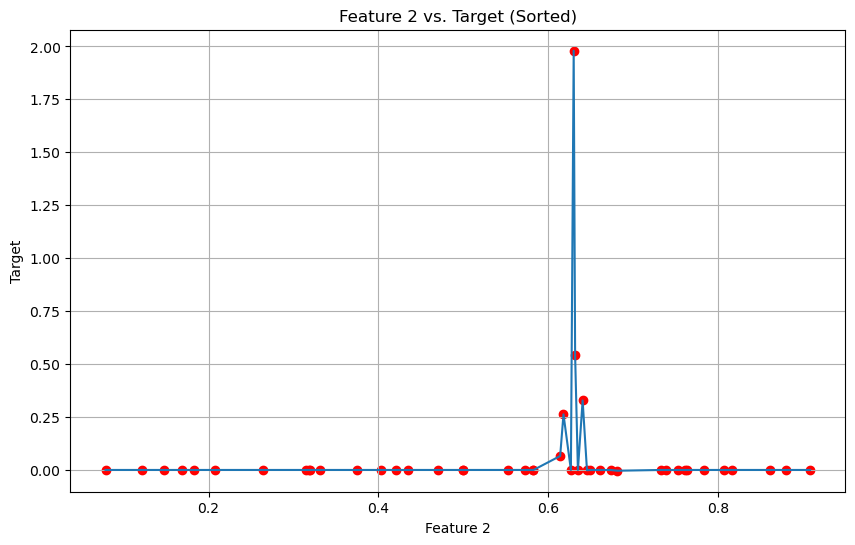

In [41]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

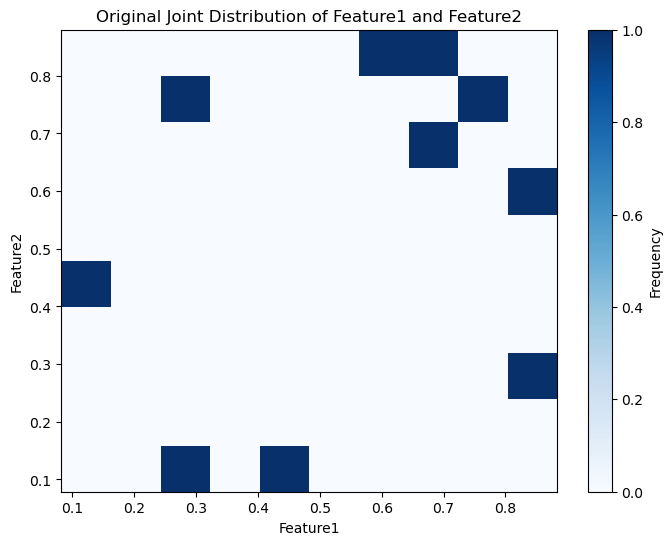

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist2d(orig_df['feature1'], orig_df['feature2'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Original Joint Distribution of Feature1 and Feature2')
plt.xlabel('Feature1')
_ = plt.ylabel('Feature2')

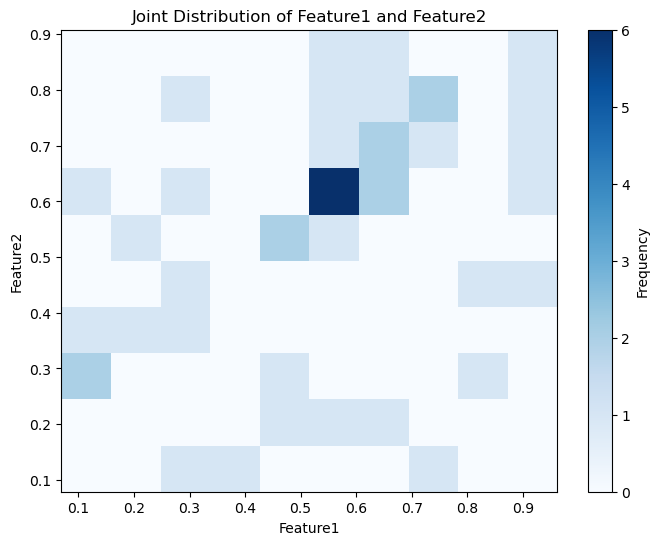

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist2d(df['feature1'], df['feature2'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Joint Distribution of Feature1 and Feature2')
plt.xlabel('Feature1')
_ = plt.ylabel('Feature2')

In [47]:
# Define the parameter grid for the Gaussian Process Regressor
print('Running...........')

#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2]
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}

# Create a Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error') # Use 5-fold cross-validation
grid_search.fit(df[['feature1', 'feature2']], df['target'])

# Get the best estimator and its parameters
best_gpr = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
print("Best Score:", grid_search.best_score_)

# Now you can use the best_gpr model for predictions
gpr = grid_search.best_estimator_
gpr

Running...........
Best Hyperparameters: {'alpha': 1e-10, 'kernel': 3.16**2 * RBF(length_scale=1), 'n_restarts_optimizer': 5, 'normalize_y': True}
Best Score: -0.10179637467910263


GaussianProcessRegressor(kernel=3.16**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5, normalize_y=True)

In [49]:
# Now you can use the best_gpr model for predictions
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(kernel=3.16**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


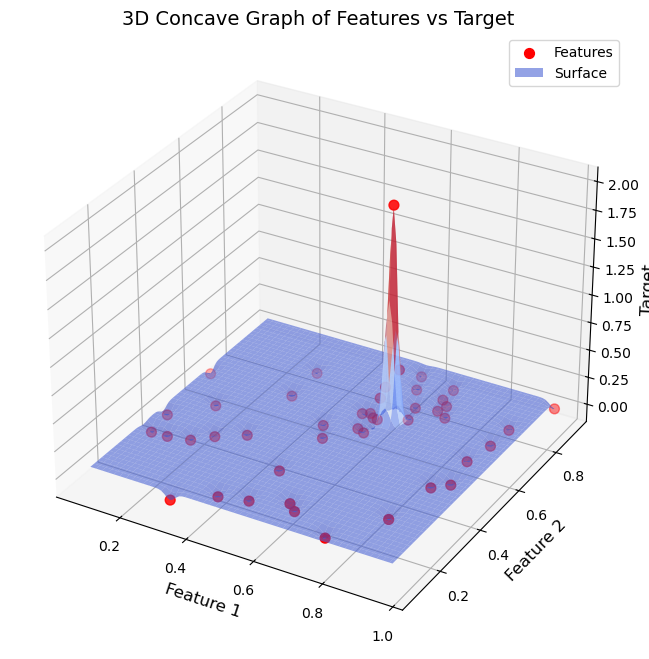

In [51]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature2'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature2'].min(), df['feature2'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature2']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


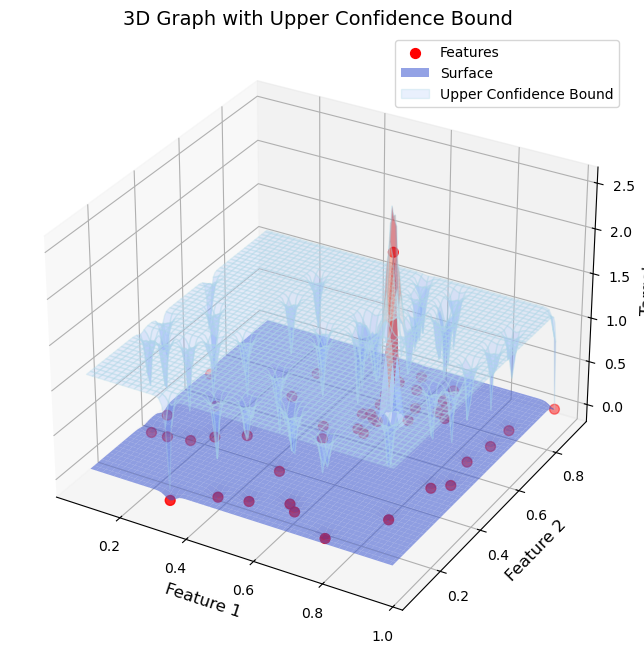

In [53]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature2'], df['target'], c='red', label='Features', marker='o', s=50)

# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature2'].min(), df['feature2'].max(), 100))

# Gaussian Process Regressor
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature2']], df['target'])
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
sigma = np.sqrt(gpr.predict(np.column_stack((X.ravel(), Y.ravel())), return_std=True)[1]).reshape(X.shape)


# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Calculate and plot upper confidence bound
upper_confidence_bound = Z + 1.96 * sigma  # 95% confidence interval
ax.plot_surface(X, Y, upper_confidence_bound, cmap=cm.coolwarm, alpha=0.3, color='lightblue', label='Upper Confidence Bound')


# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Graph with Upper Confidence Bound', fontsize=14)
ax.legend()

plt.show()

In [55]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(kernel=3.16**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5, normalize_y=True)

In [57]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.63
Feature 2 at peak of target: 0.63


In [59]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.6501140597987644
Feature 2 at peak of target: 0.6815263520602101


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


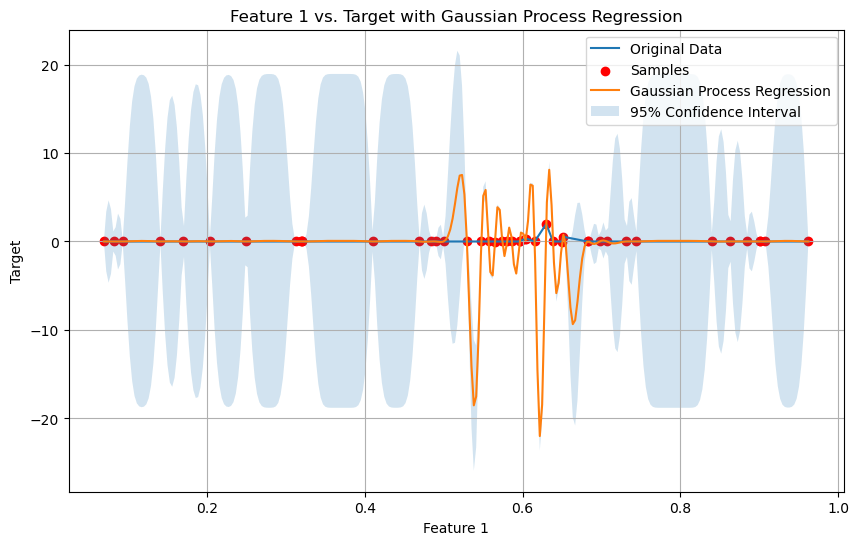

31.6**2 * RBF(length_scale=0.01)

In [61]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Assuming df is already defined as in your provided code and contains 'feature1' and 'target' columns

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values
y = df_sorted['target'].values

# Define a more flexible kernel
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Increased length_scale

# Create and fit the Gaussian Process Regressor with the improved kernel
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1) # Increased prediction points for smoother curve
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


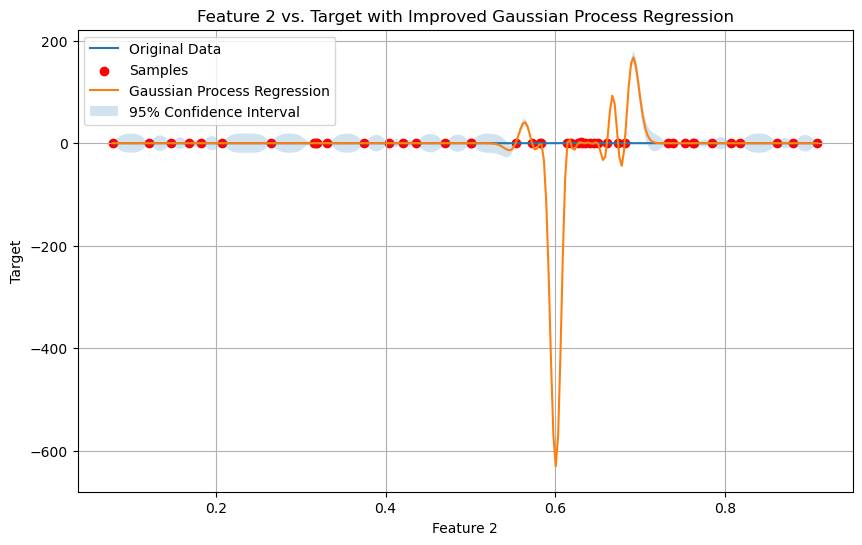

31.6**2 * RBF(length_scale=0.01)

In [63]:
# Assuming df is already defined as in your provided code

# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')
# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define a more flexible kernel for feature2
#kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2)) # Adjust length_scale

# Create and fit the Gaussian Process Regressor with the improved kernel
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Improved Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


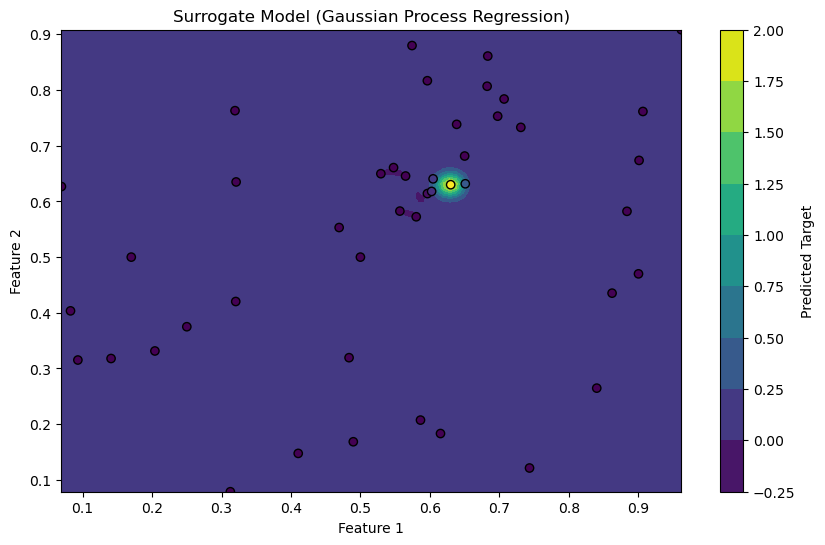

In [65]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.

X = df[['feature1', 'feature2']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [67]:
import numpy as np
from scipy.stats import norm

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


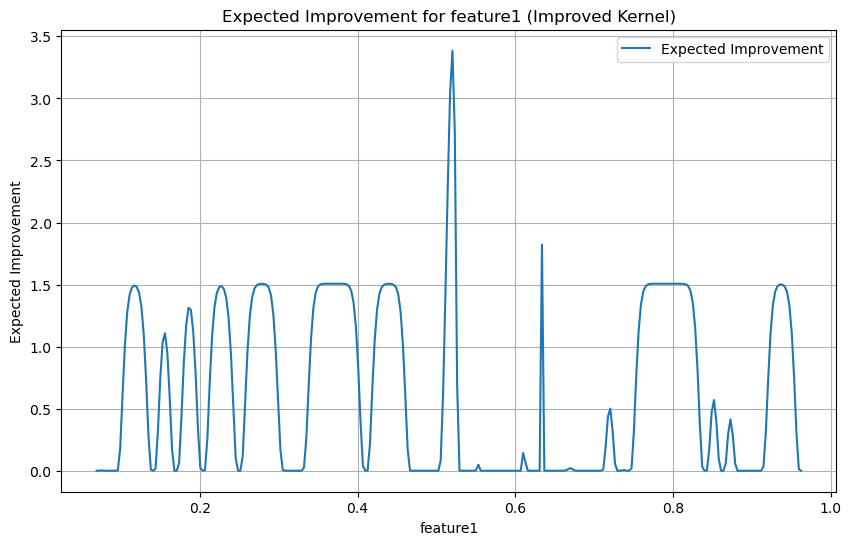

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


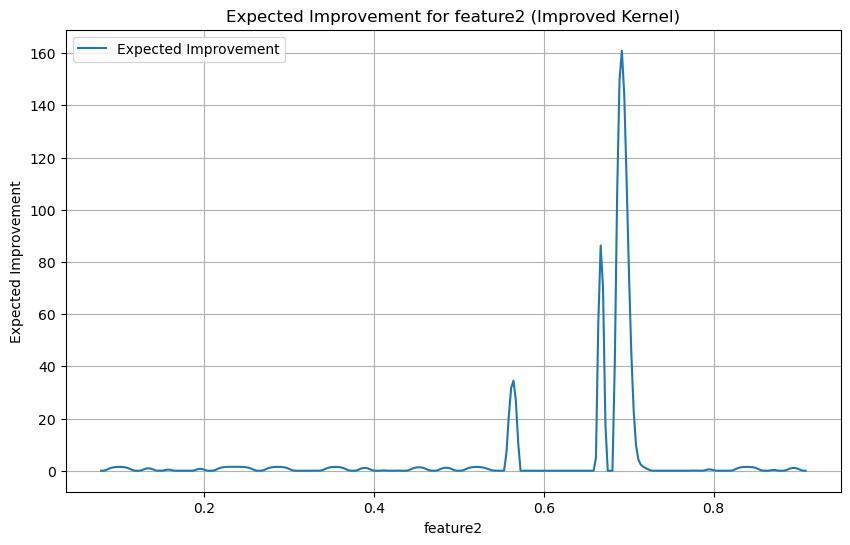

In [69]:
# Calculate and plot expected improvement for each feature
from scipy.stats import norm
from sklearn.gaussian_process.kernels import ConstantKernel as C

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Calculate and plot expected improvement for each feature

for feature_name in ['feature1', 'feature2']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the Gaussian Process Regressor with an improved kernel
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    # Calculate expected improvement
    ei = expected_improvement(X_pred, gpr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ei, label='Expected Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Expected Improvement')
    plt.title(f'Expected Improvement for {feature_name} (Improved Kernel)')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


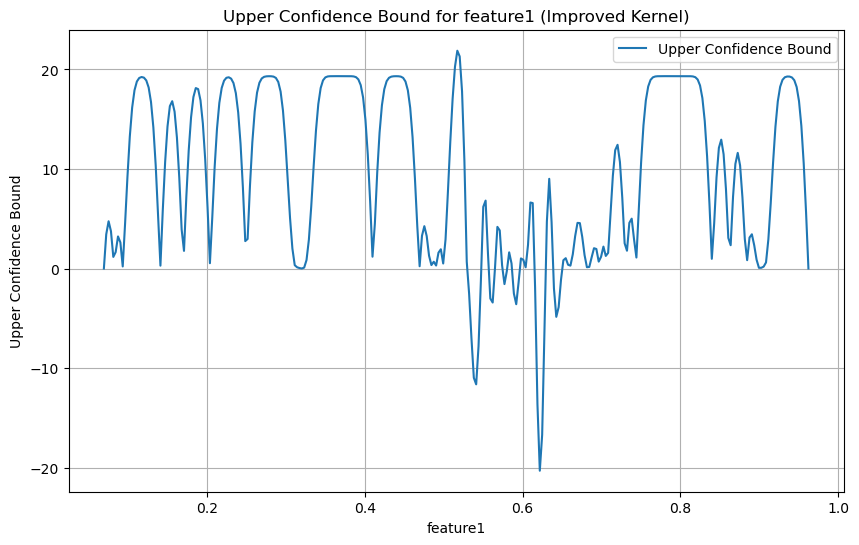

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


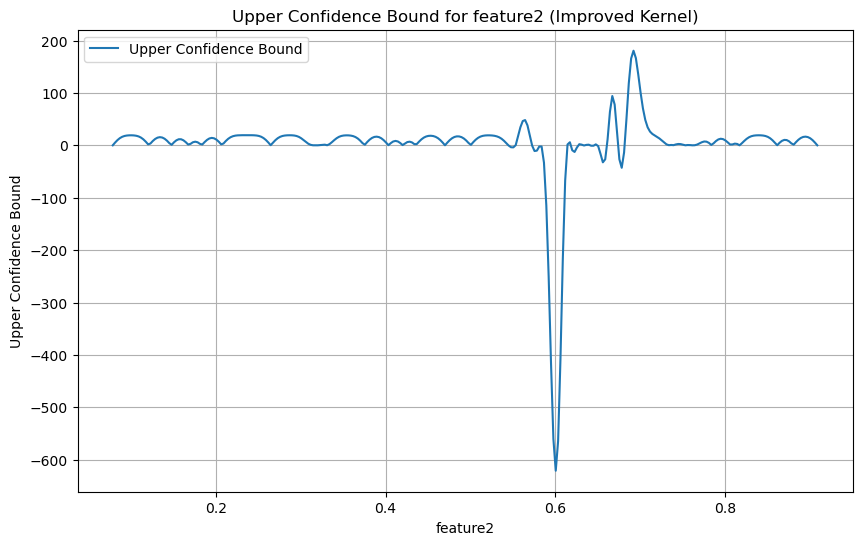

In [71]:
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Calculate and plot Upper Confidence Bound (UCB) for each feature

for feature_name in ['feature1', 'feature2']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the Gaussian Process Regressor with an improved kernel
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    # Predict mean and standard deviation
    mu, sigma = gpr.predict(X_pred, return_std=True)
    
    # Calculate UCB (you can adjust the kappa value)
    kappa = 2  # Exploration parameter (adjust as needed)
    ucb = mu + kappa * sigma

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ucb, label='Upper Confidence Bound')
    plt.xlabel(feature_name)
    plt.ylabel('Upper Confidence Bound')
    plt.title(f'Upper Confidence Bound for {feature_name} (Improved Kernel)')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


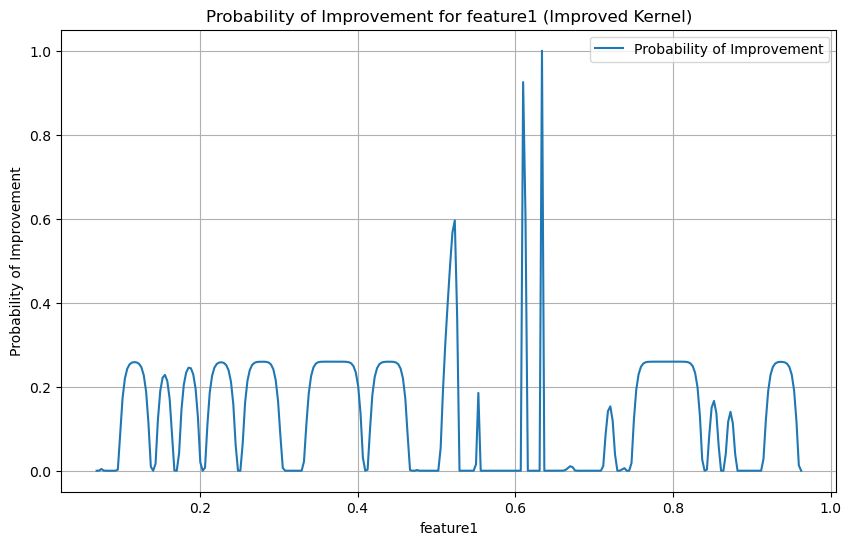

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


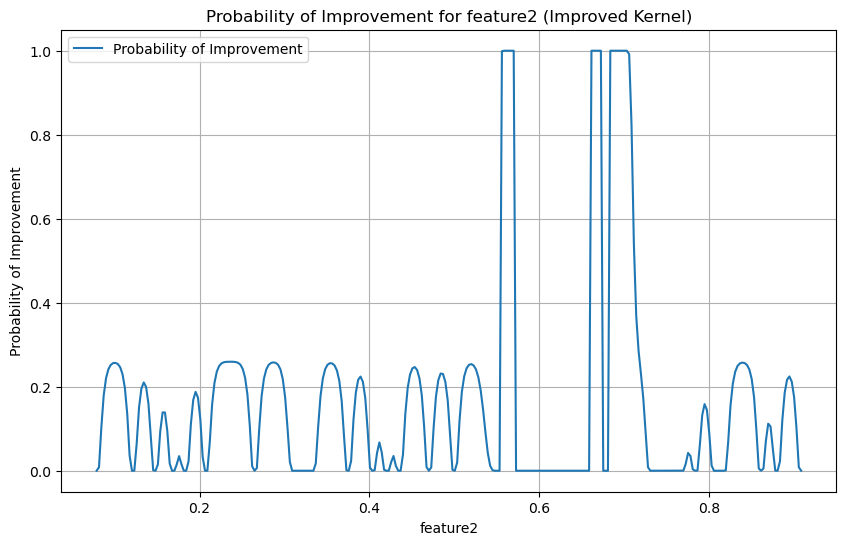

In [73]:
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Calculate and plot Probability of Improvement (PI) for each feature

for feature_name in ['feature1', 'feature2']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the Gaussian Process Regressor with an improved kernel
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    # Predict mean and standard deviation
    mu, sigma = gpr.predict(X_pred, return_std=True)
    
    # Calculate Probability of Improvement (PI)
    mu_sample_opt = np.max(gpr.y_train_)
    Z = (mu - mu_sample_opt) / sigma
    pi = norm.cdf(Z)  # Probability of improvement

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, pi, label='Probability of Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Improvement')
    plt.title(f'Probability of Improvement for {feature_name} (Improved Kernel)')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


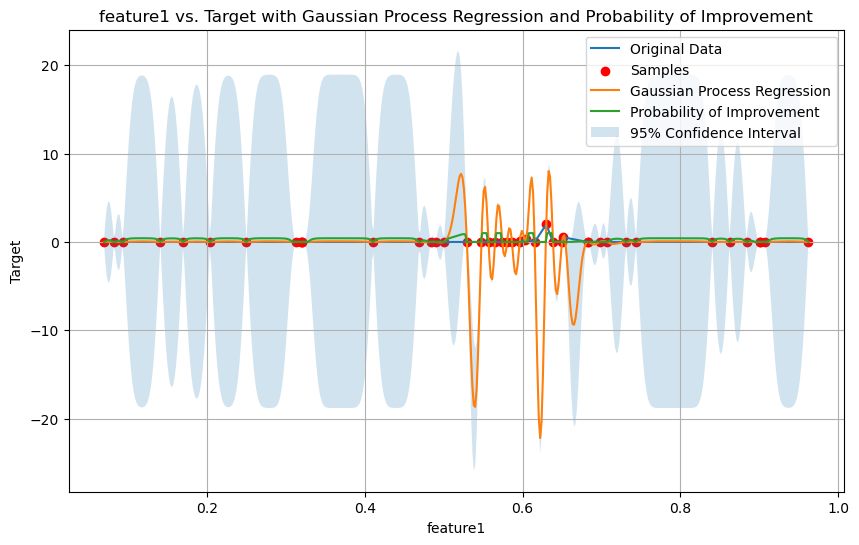

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


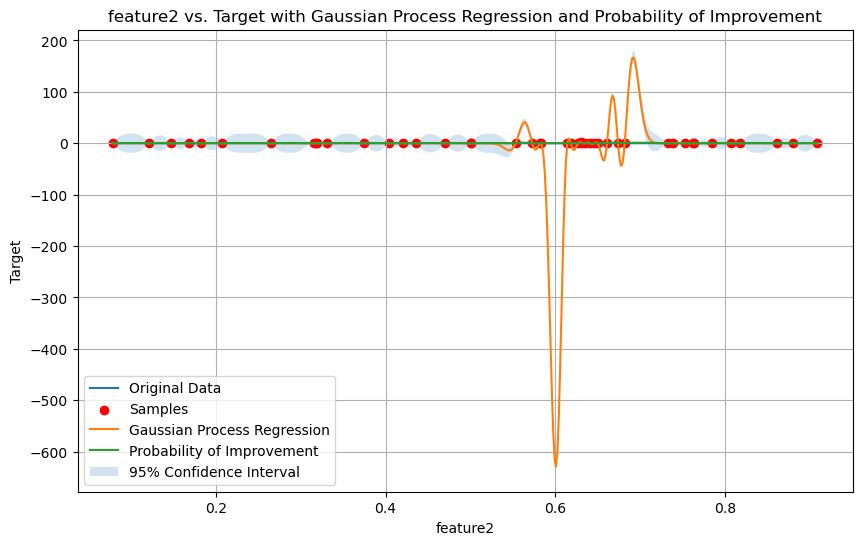

In [75]:
for feature in ['feature1', 'feature2']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement
    y_best = np.max(y)  # Current best observed target value
    poi = norm.cdf((y_pred - y_best) / sigma)

    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, poi, label='Probability of Improvement') #Plot POI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Probability of Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

In [77]:
# Function to find the best new data point based on EI
def find_best_ei_point(gpr, feature_name, df):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_index = np.argmax(ei)
    best_ei_point = X_pred[best_index]
    best_ei = ei[best_index]
    return best_ei_point, best_ei

# Function to find the best new data point based on UCB
def find_best_ucb_point(gpr, feature_name, df):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    mu, sigma = gpr.predict(X_pred, return_std=True)
    kappa = 2
    ucb = mu + kappa * sigma
    best_index = np.argmax(ucb)
    best_ucb_point = X_pred[best_index]
    best_ucb = ucb[best_index]
    return best_ucb_point, best_ucb

# Function to find the best new data point based on PI
def find_best_pi_point(gpr, feature_name, df):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    mu, sigma = gpr.predict(X_pred, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    Z = (mu - mu_sample_opt) / sigma
    pi = norm.cdf(Z)
    best_index = np.argmax(pi)
    best_pi_point = X_pred[best_index]
    best_pi = pi[best_index]
    return best_pi_point, best_pi

# Example usage
for feature_name in ['feature1', 'feature2']:

    #kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    X = df[[feature_name]].values
    y = df['target'].values
    gpr.fit(X, y)

    best_ei_point, best_ei = find_best_ei_point(gpr, feature_name, df)
    best_ucb_point, best_ucb = find_best_ucb_point(gpr, feature_name, df)
    best_pi_point, best_pi = find_best_pi_point(gpr, feature_name, df)

    print(f"For feature '{feature_name}':")
    print(f"  Best EI point: {best_ei_point[0]}, EI: {best_ei}")
    print(f"  Best UCB point: {best_ucb_point[0]}, UCB: {best_ucb}")
    print(f"  Best PI point: {best_pi_point[0]}, PI: {best_pi}")

For feature 'feature1':
  Best EI point: 0.520311552629882, EI: 3.384193805478221
  Best UCB point: 0.5173253134883202, UCB: 21.875103766268523
  Best PI point: 0.6337886400092351, PI: 0.99997461364121
For feature 'feature2':
  Best EI point: 0.6919021727880087, EI: 160.92790398987492
  Best UCB point: 0.6919021727880087, UCB: 180.50509622557277
  Best PI point: 0.5642720725049257, PI: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

In [79]:
# Create a new data array with the best values
new_data_array = np.array(list([0.6576785531417305, 0.23687311960484336]))
print("\nNew Data Array:")
new_data_array


New Data Array:


NameError: name 'new_data_array' is not defined

In [81]:
best_feature_values = {}

for feature in ['feature1', 'feature2']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    
    # Use the prediction with the highest value (you can change the acquisition function if needed)
    best_index = np.argmax(y_pred)
    best_feature_value = X_pred[best_index][0]
    best_feature_values[feature] = best_feature_value

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()))

# Display the results formatted to six significant figures
print("Single Best Values for Each Feature (6 significant figures):")
for feature, value in best_feature_values.items():
    print(f"{feature}: {value:.6f}")

print("\nNew Data Array:")
new_data_array

Single Best Values for Each Feature (6 significant figures):
feature1: 0.633035
feature2: 0.692191

New Data Array:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

array([0.6330346 , 0.69219131])

In [83]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=2)

print("New Input Data (with noise):", new_input_data)

New Input Data (with noise): [0.62772402 0.6886528 ]


In [85]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.627724, 0.688653]


In [87]:
# Add the new data points
next_inputs = np.vstack([inputs, new_input_data])

len(next_inputs), len(inputs)

(46, 45)

In [89]:
next_inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.90048221, 0.46996691],
       [0.86243528, 0.4352856 ],
       [0.09311333, 0.31520745],
       [0.48975434, 0.16844847],
       [0.90132685, 0.67366454],
       [0.32101719, 0.63497061],
       [0.32044659, 0.42030664],
       [0.63861791, 0.73839723],
       [0.59648578, 0.61407967],
       [0.48366726, 0.31942835],
       [0.96227495, 0.90831843],
       [0.46937596, 0.55313941],
       [0.06938944, 0.62671938],
       [0.59640851, 0.81673367],
       [0.1409109 , 0.3179331 ],
       [0.58653471, 0.20732755],
       [0.61533925, 0.18320905],
       [0.9068703 , 0.76151747],
       [0.58038966, 0.57243686],
       [0.55684911, 0.58265192],
       [0.

In [91]:
next_data = {'feature1': next_inputs[:,0],
             'feature2': next_inputs[:,1],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2
0,0.319404,0.762959
1,0.574329,0.879898
2,0.731024,0.733000
3,0.840353,0.264732
4,0.650114,0.681526
5,0.410437,0.147554
6,0.312691,0.078723
7,0.683418,0.861057
8,0.082507,0.403488
9,0.883890,0.582254


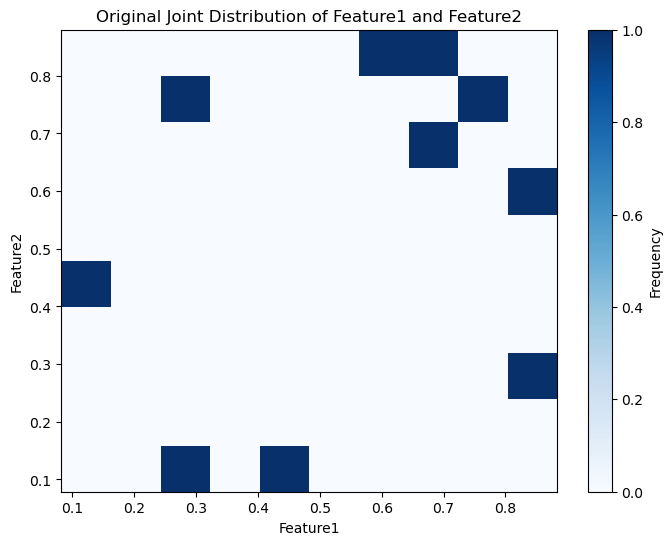

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist2d(orig_df['feature1'], orig_df['feature2'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Original Joint Distribution of Feature1 and Feature2')
plt.xlabel('Feature1')
_ = plt.ylabel('Feature2')

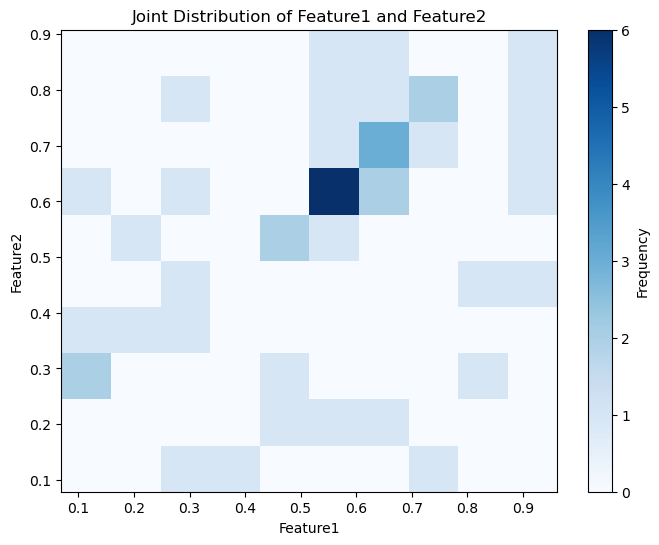

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist2d(next_df['feature1'], next_df['feature2'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Joint Distribution of Feature1 and Feature2')
plt.xlabel('Feature1')
_ = plt.ylabel('Feature2')

In [97]:
next_inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.90048221, 0.46996691],
       [0.86243528, 0.4352856 ],
       [0.09311333, 0.31520745],
       [0.48975434, 0.16844847],
       [0.90132685, 0.67366454],
       [0.32101719, 0.63497061],
       [0.32044659, 0.42030664],
       [0.63861791, 0.73839723],
       [0.59648578, 0.61407967],
       [0.48366726, 0.31942835],
       [0.96227495, 0.90831843],
       [0.46937596, 0.55313941],
       [0.06938944, 0.62671938],
       [0.59640851, 0.81673367],
       [0.1409109 , 0.3179331 ],
       [0.58653471, 0.20732755],
       [0.61533925, 0.18320905],
       [0.9068703 , 0.76151747],
       [0.58038966, 0.57243686],
       [0.55684911, 0.58265192],
       [0.

In [99]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.627724, 0.688653]


In [101]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.63
Feature 2 at peak of target: 0.63


In [103]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")

Feature 1 at peak of target: 0.6501140597987644
Feature 2 at peak of target: 0.6815263520602101


In [105]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.627724, 0.688653]


In [ ]:
0.627724-0.688653